<a href="https://colab.research.google.com/github/sudarmintosenlau/Customer-Segmentasion/blob/main/Data_Science_in_Marketing_Customer_Segmentation_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## SECTION 1: Customer Segmentation with Python - Part 1

## Pengantar

Suatu pagi kamu terbangun dari tidur dan mendapati ada sebuah e-mail masuk dari e-commerce idaman kamu. Kamu tau bahwa ini bukan sekedar email promosi biasa karena satu minggu lalu kamu baru saja menyelesaikan proses akhir rekruitment di perusahaan tersebut.

"SELAMAT BERGABUNG BERSAMA KAMI", sebuah kalimat yang memiliki arti mendalam setelah kamu berusaha mengejar cita-cita kamu untuk menjadi data scientist. Hingga akhirnya cita-cita kamu tercapai.

Hari pertama pun tiba, kamu menyelesaikan orientasi dan akhirnya bertemu dengan tim data scientist di perusahaan tersebut. Kamu mulai beradaptasi dan segera mendapatkan tugas pertama kamu sebagai seorang junior data scientist.

Perusahaan kamu sedang berusaha untuk mengenal lebih baik pelanggannya. Tujuannya agar perusahaan kamu dapat membuat strategi pemasaran yang lebih tepat dan juga efisien bagi tiap tiap pelanggan. Kamu di diberikan tugas agar dapat memberikan rekomendasi untuk menyelesaikan permasalahan tersebut.

Kamu teringat bahwa beberapa bulan sebelumnya kamu pernah belajar menghadapi permasalahan serupa di tempat kamu belajar. Salah satu teknik yang bisa dilakukan untuk mengenal lebih baik pelanggan kamu adalah dengan melakukan segmentasi pelanggan. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut kamu akan menggunakan teknik unsupervised machine learning.

Salah satunya teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes.  Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.

Mempersiapkan Library dan Data
Kamu sangat bersemangat untuk segera menyelesaikan masalah tersebut. Kamu mulai dari mencari tau data apa yang tersedia dan mengumpulkan data yang dibutuhkan terkait pelanggan. Seperti dikebanyakan tempat, kamu berkoordinasi dengan tim data engineer untuk mendapatkan data yang di butuhkan dan berdiskusi dengan tim bisnis untuk memahami arti dari data-data yang kamu miliki.

Sampai akhirnya kamu mendapatkan data yang kamu perlukan.

![image](https://user-images.githubusercontent.com/62486840/148084560-96c0294e-34e6-4cea-b299-a098103cf859.png)

Data tersebut memiliki tujuh kolom dengan penjelasan sebagai berikut:

* Customer ID: Kode pelanggan dengan format campuran teks CUST- diikuti angka
* Nama Pelanggan: Nama dari pelanggan dengan format teks tentunya
* Jenis Kelamin: Jenis kelamin dari pelanggan, hanya terdapat dua isi data kategori yaitu Pria dan Wanita
* Umur: Umur dari pelanggan dalam format angka
* Profesi: Profesi dari pelanggan, juga bertipe teks kategori yang terdiri dari Wiraswasta, Pelajar, Professional, Ibu Rumah Tangga, dan Mahasiswa.
* Tipe Residen: Tipe tempat tinggal dari pelanggan kita, untuk dataset ini hanya ada dua kategori: Cluster dan Sector.
* Nilai Belanja Setahun: Merupakan total belanja yang sudah dikeluarkan oleh pelanggan tersebut.

## Mempersiapkan Library

Masalah ini akan dapat di selesaikan dengan menggunakan bantuan library - library di bawah ini:

* Pandas, digunakan untuk melakukan pemrosesan analisis data
* Matplotlib, digunakan sebagai dasar untuk melakukan visualisasi data
* Seaborn, digunakan di atas matplotlib untuk melakukan data visualisasi yang lebih menarik
* Scikit - Learn, digunakan untuk mempersiapkan data sebelum dilakukan permodelan
* kmodes, digunakan untuk melakukan permodelan menggunakan algoritma K-Modes dan K-Prototypes.
* Pickle, digunakan untuk melakukan penyimpanan dari model yang akan di buat.

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  
from sklearn.preprocessing import LabelEncoder  
  


In [ ]:
import pickle  
from pathlib import Path

## Membaca Data Pelanggan

Langkah pertama yang perlu di lakukan adalah membaca data tersebut yang semula adalah textfile menjadi pandas dataframe.


In [ ]:
import pandas as pd

# import dataset  
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")  
  
# menampilkan data  
print(df.head())

  Customer_ID       Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-001         Budi Anggara  ...       Sector              9497927
1    CUST-002     Shirley Ratuwati  ...      Cluster              2722700
2    CUST-003         Agus Cahyono  ...      Cluster              5286429
3    CUST-004     Antonius Winarta  ...      Cluster              5204498
4    CUST-005  Ibu Sri Wahyuni, IR  ...      Cluster             10615206

[5 rows x 7 columns]


## Melihat Informasi dari Data

Selanjutnya kita perlu melihat informasi dari data yang ada. Sehingga dengan mengetahui jumlah baris dan kolom, nama kolom, identifikasi null values,  dan juga mengetahui tipe data dengan mudah.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
dtypes: int64(2), object(5)
memory usage: 2.9+ KB


![image](https://user-images.githubusercontent.com/62486840/148087072-83ab9f7d-58a9-4005-8739-f6b79a04a02e.png)


## Kesimpulan

Setelah melakukan pemanggilan data dan melihat informasi data yang kita miliki, kita akhirnya mengetahui bahwa:

Data yang akan digunakan terdiri dari 50 baris dan 7 kolom
Tidak ada nilai null pada data
Dua kolom memiliki tipe data numeric dan lima data bertipe string
Tips:

Dalam setiap project machine learning, kita harus memahami informasi dasar dari data yang kita miliki sebelum melakukan analisa lebih lanjut. Dengan melakukan hal ini, kita bisa memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data null di tiap tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang kita gunakan. Informasi ini nantinya akan menentukan proses apa yang perlu kita lakukan selanjutnya.

## Melakukan Eksplorasi Data

Pada tahap sebelumnya kita sudah menyiapkan data dan melihat informasi dasar dari data yang kamu miliki.

Selanjutnya kita perlu melakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan dan akan melakukan eksplorasi untuk data numerik dan juga data kategorikal.

## Eksplorasi Data Numerik

Pertama kita perlu melihat distribusi data dari data yang berjenis numerik. Disini kita akan menggunakan boxplot dan juga histogram untuk melihat distribusi datanya. Untuk membuat grafik tersebut, kita perlu menyiapkan kolom mana yang merupakan kolom numerik. Kemudian menggunakan library seaborn untuk membuat plot masing-masing kolom numerik, yaitu 'Umur' dan 'NilaiBelanjaSetahun'.


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/li

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

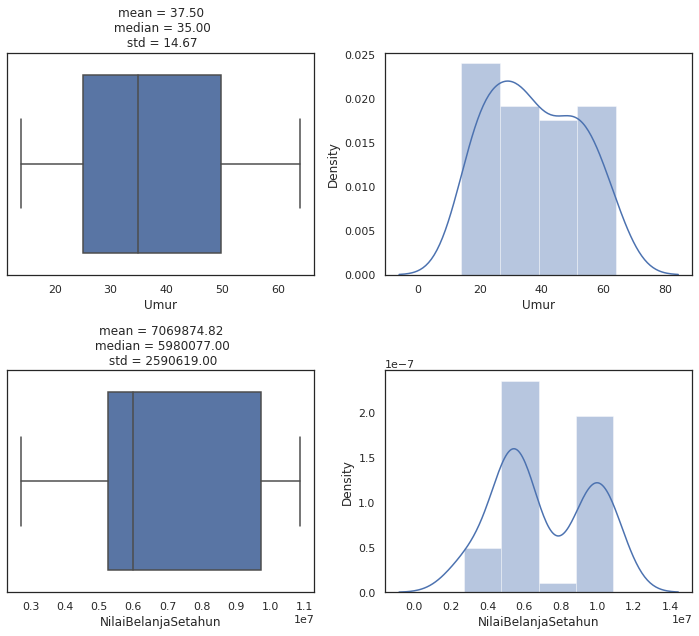

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white')
import pandas as pd
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t")
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(2, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    sns.boxplot(df[kol], ax = axs[i][0])
	    sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
kolom_numerik = ['Umur','NilaiBelanjaSetahun']
observasi_num(kolom_numerik)

## Eksplorasi Data Kategorikal

Selain data numerikal, kita juga perlu melihat bagaimana persebaran data pada kolom-kolom yang memiliki jenis kategorikal yaitu Jenis Kelamin, Profesi dan Tipe Residen. Kamu dapat melakukan hal ini dengan menggunakan countplot dari library seaborn.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


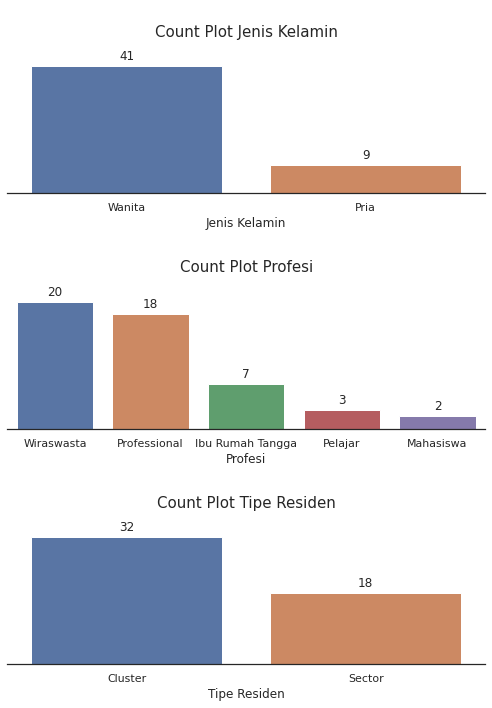

In [ ]:
# Menyiapkan kolom kategorikal  
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  

# Membuat canvas
fig, axs = plt.subplots(3,1,figsize=(7,10)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol in enumerate(kolom_kategorikal):  
    # Membuat Plot
    sns.countplot(df[kol], order = df[kol].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points')
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs[i])
    plt.tight_layout()

# Tampilkan plot
plt.show()

![image](https://user-images.githubusercontent.com/62486840/148494431-20146ab5-6ac3-4310-a6a7-5f2d6a7c3eae.png)


**Kesimpulan**

Dari hasil eksplorasi data tersebut kamu dapat mendapatkan informasi:

* Rata-rata dari umur pelanggan adalah 37.5 tahun
* Rata-rata dari nilai belanja setahun pelanggan adalah 7,069,874.82
* Jenis kelamin pelanggan di dominasi oleh wanita sebanyak 41 orang (82%) dan laki-laki sebanyak 9 orang (18%)
* Profesi terbanyak adalah Wiraswasta (40%) diikuti dengan Professional (36%) dan lainnya sebanyak (24%)
* Dari seluruh pelanggan 64% dari mereka tinggal di Cluster dan 36% nya tinggal di Sektor

**Tips:**

Kita dapat mengenal data kita lebih jauh lagi pada tahapan eksplorasi data ini. Proses eksplorasi data bisa berupa *univariate* maupun *multivariate* data eksplorasi. Eksplorasi Data *Univariate* melihat karakteristik tiap-tiap *feature*, misalnya dengan melihat statistik deskriptif, membuat *histogram*, *kdeplot*, *countplot* maupun *boxplot*. Sedangkan untuk Eksplorasi Data *Multivariate*, kita melihat hubungan tiap variabel dengan variabel lainnya, misal kan dengan membuat korelasi *matrix*, melihat *predictive power*, *cross tabulasi*, dan lainnya.


## Mempersiapkan Data Sebelum Permodelan

Setiap machine learning model memiliki karakteristik yang berbeda-beda. Hal ini membuat kita harus mempersiapkan data yang kita miliki sebelum digunakan untuk melakukan permodelan. Sehingga dapat menyesuaikan dengan karakteristik yang dimiliki oleh tiap model dan mendapatkan hasil yang optimal.

Kita berencana akan melakukan permodelan dengan menggunakan teknik unsupervised clustering. Algoritma yang akan digunakan adalah K-Prototypes. Salah satu faktor utama dalam algoritma ini adalah kita perlu menggunakan data yang skala antar variabelnya setara. Selain itu kita juga perlu melakukan encoding kolom - kolom kategorikal yang dimiliki menjadi numerik. Kemudian menggabungkan hasil pemrosesan data tersebut menjadi satu dataframe untuk digunakan dalam permodelan.

## Standarisasi Kolom Numerik

Supaya mendapatkan hasil yang maksimal dalam penerapan algoritma ini, kita perlu menjadikan data-data numerik yang kita miliki berada pada satu skala. Hal ini dapat dilakukan dengan melakukan standardisasi data yang kita miliki.

Tujuannya adalah agar variabel yang memiliki skala besar tidak mendominasi bagaimana cluster akan dibentuk dan juga tiap variabel akan dianggap sama pentingnya oleh algoritma yang akan digunakan.

In [ ]:
from sklearn.preprocessing import StandardScaler

kolom_numerik = ['Umur','NilaiBelanjaSetahun']

# Statistik sebelum Standardisasi
print('Statistik Sebelum Standardisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standardisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistic
print('Contoh hasil standardisasi\n')
print(df_std.head())

print('Statistik hasil standardisasi\n')
print(df_std.describe().round(0))

Statistik Sebelum Standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean   37.5            7069874.8
std    14.7            2590619.0
min    14.0            2722700.0
25%    25.0            5257529.8
50%    35.0            5980077.0
75%    49.8            9739615.0
max    64.0           10884508.0
Contoh hasil standardisasi

       Umur  NilaiBelanjaSetahun
0  1.411245             0.946763
1 -1.617768            -1.695081
2  0.722833            -0.695414
3  1.067039            -0.727361
4  0.240944             1.382421
Statistik hasil standardisasi

       Umur  NilaiBelanjaSetahun
count  50.0                 50.0
mean    0.0                 -0.0
std     1.0                  1.0
min    -2.0                 -2.0
25%    -1.0                 -1.0
50%    -0.0                 -0.0
75%     1.0                  1.0
max     2.0                  1.0


## Konversi Kategorikal Data dengan Label Encoder

Selanjutnya kita perlu merubah kolom-kolom yang berjenis kategorikal menjadi angka. Kita akan menggunakan salah satu fungsi dari sklearn yaitu LabelEncoder. Pada dasarnya fungsi ini akan melakukan konversi data pelanggan dari teks menjadi numerik.

Sebagai contoh untuk kolom Jenis Kelamin, teks "Pria" akan diubah menjadi angka 0 dan teks "Wanita" akan diuubah menjadi angka satu. Perubahan ini perlu kita untuk semua teks sebelum digunakan pada algoritma K-Prototype.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Inisiasi nama kolom kategorikal
kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']

# Membuat salinan data frame
df_encode = df[kolom_kategorikal].copy()


# Melakukan labelEncoder untuk semua kolom kategorikal
for col in kolom_kategorikal:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Profesi  Tipe Residen
0              0        4             1
1              1        2             0
2              0        3             0
3              0        3             0
4              1        4             0


## Menggabungkan Data untuk Permodelan

Setelah menyelesaikan dua tahap sebelumnya, kali ini kita akan menggabungkan kedua hasil pemrosesan tersebut menjadi satu data frame. Data frame ini yang akan digunakan untuk permodelan.

In [ ]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             1  1.411245             0.946763
1              1        2             0 -1.617768            -1.695081
2              0        3             0  0.722833            -0.695414
3              0        3             0  1.067039            -0.727361
4              1        4             0  0.240944             1.382421


![image](https://user-images.githubusercontent.com/62486840/148684219-42f1d72a-d390-40e0-9ebc-b2e6ea9da184.png)


## Kesimpulan

Sampai di sini, kita sudah menggunakan kemampuan kita dalam menyiapkan library dan data. Kemudian melakukan data eksplorasi dan pemrosesan data hingga mendapatkan data yang siap digunakan untuk permodelan. 

## SECTION 2: Customer Segmentation with Python - Part 2

### Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kita perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

 

Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikannya dengan line plot atau point plot.

In [1]:
pip uninstall kmodes && pip install kmodes

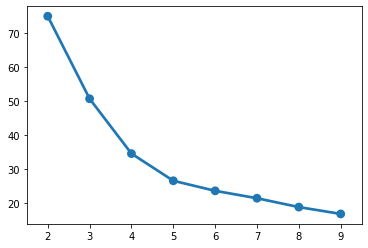

In [2]:
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt  
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

# Melakukan Iterasi untuk Mendapatkan nilai Cost  
cost = {}  
for k in range(2,10):  
    kproto = KPrototypes (n_clusters = k,random_state=75)  
    kproto.fit_predict(df_model, categorical=[0,1,2])  
    cost [k]= kproto.cost_  
  
# Memvisualisasikan Elbow Plot  
sns.pointplot(x=list(cost.keys()), y=list(cost.values()))  
plt.show()

### Membuat Model

Selanjutnya kita dapat melakukan pembuatan model dengan jumlah kluster yang sudah didapat pada tahap sebelumnya yaitu 5 dan menyimpan hasilnya sebagai pickle file.

In [3]:
import pandas as pd 
df_model = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/df-customer-segmentation.csv')

import pickle  
from kmodes.kmodes import KModes  
from kmodes.kprototypes import KPrototypes  
  
kproto = KPrototypes ( n_clusters = 5, random_state = 75)  
kproto = kproto.fit(df_model, categorical=[0,1,2])  
  
#Save Model  
pickle.dump(kproto, open('cluster.pkl', 'wb'))  

### Menggunakan Model

Model yang sudah kita buat dapat digunakan untuk menentukan setiap pelanggan masuk ke dalam cluster yang mana. Kali ini kita akan menggunakan model tersebut untuk menentukan segmen pelanggan yang ada di dataset.

In [4]:
df = pd.read_csv("https://storage.googleapis.com/dqlab-dataset/customer_segments.txt", sep="\t") 
# Menentukan segmen tiap pelanggan    
clusters =  kproto.predict(df_model, categorical=[0,1,2])    
print('segmen pelanggan: {}\n'.format(clusters))    
    
# Menggabungkan data awal dan segmen pelanggan    
df_final = df.copy()    
df_final['cluster'] = clusters
print(df_final.head())  

segmen pelanggan: [1 0 2 2 3 4 1 2 4 4 2 2 1 1 3 4 4 2 3 0 3 2 4 3 3 2 3 4 2 2 0 1 0 3 4 3 4
 1 4 0 4 3 4 3 4 3 2 1 4 1]

  Customer_ID       Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0    CUST-001         Budi Anggara  ...             9497927        1
1    CUST-002     Shirley Ratuwati  ...             2722700        0
2    CUST-003         Agus Cahyono  ...             5286429        2
3    CUST-004     Antonius Winarta  ...             5204498        2
4    CUST-005  Ibu Sri Wahyuni, IR  ...            10615206        3

[5 rows x 8 columns]


### Menampilkan Cluster Tiap Pelanggan

Setelah kita menggabungkan data awal pelanggan dan cluster-nya, kita perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu kita dalam memberi nama tiap cluster berdasarkan karakteristiknya.

In [5]:
# Menampilkan data pelanggan berdasarkan cluster nya  
for i in range (0,5):  
    print('\nPelanggan cluster: {}\n'.format(i))  
    print(df_final[df_final['cluster']== i])


Pelanggan cluster: 0

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
1     CUST-002  Shirley Ratuwati  ...             2722700        0
19    CUST-020    Irene Novianto  ...             2896845        0
30    CUST-031     Eviana Handry  ...             3042773        0
32    CUST-033   Cecilia Kusnadi  ...             3047926        0
39    CUST-040    Irene Darmawan  ...             2861855        0

[5 rows x 8 columns]

Pelanggan cluster: 1

   Customer_ID    Nama Pelanggan  ... NilaiBelanjaSetahun  cluster
0     CUST-001      Budi Anggara  ...             9497927        1
6     CUST-007     Cahyono, Agus  ...             9837260        1
12    CUST-013      Cahaya Putri  ...             9333168        1
13    CUST-014    Mario Setiawan  ...             9471615        1
31    CUST-032   Chintya Winarni  ...            10663179        1
37    CUST-038      Agatha Salim  ...            10477127        1
47    CUST-048  Maria Hutagalung  ...            10390732    

### Visualisasi Hasil Clustering - Box Plot

Kita juga membuat visualisasi hasil clustering untuk dapat memudahkan kita melakukan penamaan di tiap-tiap cluster.

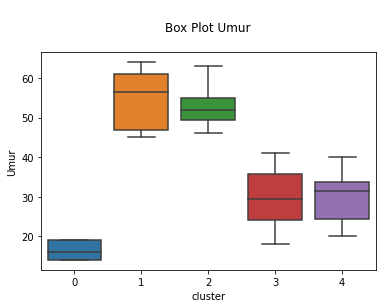

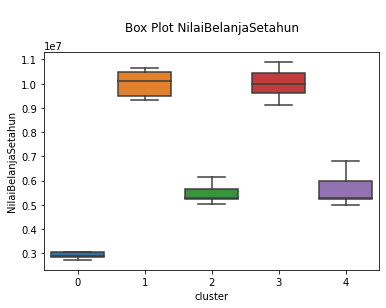

In [6]:
# Data Numerical
kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
  
for i in kolom_numerik:  
    plt.figure(figsize=(6,4))  
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)  
    plt. title ('\nBox Plot {}\n'.format(i), fontsize=12)  
    plt.show() 

### Visualisasi Hasil Clustering - Count Plot

Kita juga membuat visualisasi hasil clustering untuk dapat memudahkan kita melakukan penamaan di tiap-tiap cluster.

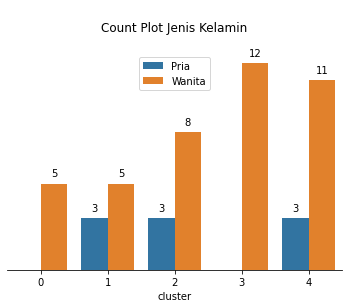

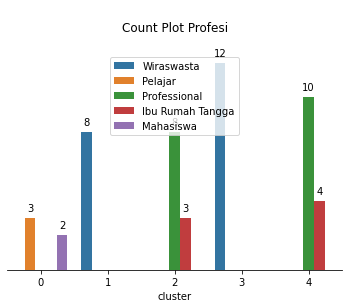

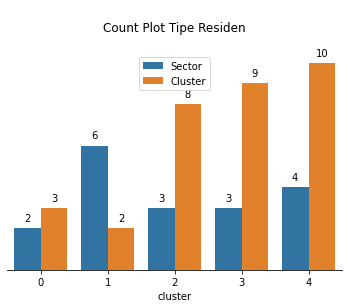

In [7]:
# Data Kategorikal  
kolom_categorical = ['Jenis Kelamin','Profesi','Tipe Residen']  
  
for i in kolom_categorical:  
    plt.figure(figsize=(6,4))  
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )  
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)  
    ax. legend (loc="upper center")  
    for p in ax.patches:  
        ax.annotate(format(p.get_height(), '.0f'),  
                    (p.get_x() + p.get_width() / 2., p.get_height()),  
                     ha = 'center',  
                     va = 'center',  
                     xytext = (0, 10),  
                     textcoords = 'offset points')  
      
    sns.despine(right=True,top = True, left = True)  
    ax.axes.yaxis.set_visible(False)  
    plt.show()  


### Menamakan Cluster

Dari hasil observasi yang dilakukan kamu dapat memberikan nama segmen dari tiap tiap nomor klusternya, yaitu:

Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.

Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.

Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.

Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

In [8]:

# Mapping nama kolom  
df_final['segmen'] = df_final['cluster'].map({  
    0: 'Diamond Young Member',  
    1: 'Diamond Senior Member',  
    2: 'Silver Member',  
    3: 'Gold Young Member',  
    4: 'Gold Senior Member'  
})  

print(df_final.info())
print(df_final.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_ID          50 non-null     object
 1   Nama Pelanggan       50 non-null     object
 2   Jenis Kelamin        50 non-null     object
 3   Umur                 50 non-null     int64 
 4   Profesi              50 non-null     object
 5   Tipe Residen         50 non-null     object
 6   NilaiBelanjaSetahun  50 non-null     int64 
 7   cluster              50 non-null     uint16
 8   segmen               50 non-null     object
dtypes: int64(2), object(6), uint16(1)
memory usage: 3.3+ KB
None
  Customer_ID       Nama Pelanggan  ... cluster                 segmen
0    CUST-001         Budi Anggara  ...       1  Diamond Senior Member
1    CUST-002     Shirley Ratuwati  ...       0   Diamond Young Member
2    CUST-003         Agus Cahyono  ...       2          Silver Member
3    CUST

### Kesimpulan

Melakukan segmentasi pelanggan dan mendapatkan nama yang cocok untuk masing masing cluster, yaitu:

Cluster 0: Diamond Young Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Selain itu isi dari cluster ini memiliki umur sekitar 18 - 41 tahun dengan rata-ratanya adalah 29 tahun.

Cluster 1: Diamond Senior Entrepreneur, isi cluster ini adalah para wiraswasta yang memiliki nilai transaksi rata-rata mendekati 10 juta. Isi dari cluster ini memiliki umur sekitar 45 - 64 tahun dengan rata-ratanya adalah 55 tahun.

Cluster 2: Silver Students, isi cluster ini adalah para pelajar dan mahasiswa dengan rata-rata umur mereka adalah 16 tahun dan nilai belanja setahun mendekati 3 juta.

Cluster 3: Gold Young Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia muda dengan rentang umur sekitar 20 - 40 tahun dan dengan rata-rata 30 tahun dan nilai belanja setahunnya mendekati 6 juta.

Cluster 4: Gold Senior Member, isi cluster ini adalah para profesional dan ibu rumah tangga yang berusia tua dengan rentang umur 46 - 63 tahun dan dengan rata-rata 53 tahun dan nilai belanja setahunnya mendekati 6 juta.

### Mempersiapkan Data Baru

Disini kita membuat contoh data baru untuk diprediksi dengan model yang sudah dibuat. Hal ini kamu lakukan dengan membuat satu buah dataframe yang berisi informasi pelanggan.

In [9]:
import pandas as pd
# Data Baru  
data = [{  
    'Customer_ID': 'CUST-100' ,  
    'Nama Pelanggan': 'Joko' ,  
    'Jenis Kelamin': 'Pria',  
    'Umur': 45,  
    'Profesi': 'Wiraswasta',  
    'Tipe Residen': 'Cluster' ,  
    'NilaiBelanjaSetahun': 8230000  
      
}]  
  
# Membuat Data Frame  
new_df = pd.DataFrame(data)  
  
# Melihat Data  
print(new_df) 

  Customer_ID Nama Pelanggan  ... Tipe Residen  NilaiBelanjaSetahun
0    CUST-100           Joko  ...      Cluster              8230000

[1 rows x 7 columns]


### Membuat Fungsi Data Pemrosesan

Selanjutnya kita perlu membuat fungsi untuk melakukan pemrosesan data berdasarkan parameter yang sama pada saat kita melakukan permodelan dan kita panggil dengan data baru kita.

Jadi fungsi ini nantinya akan bisa digunakan untuk:

Melakukan konversi data kategorikal menjadi numerik

Dari proses sebelumnya kita tau representasi tiap kode dan maksudnya yaitu:

Jenis Kelamin

* 0 : Pria

* 1 : Wanita

Profesi

* 0 : Ibu Rumah Tangga
* 1 : Mahasiswa
* 2 : Pelajar
* 3 : Professional
* 4 : Wiraswasta
Tipe Residen

* 1 : Sector
* 0 : Cluster

Selanjutnya kita harus membuat fungsi untuk merubah data kategorikal menjadi numerik berdasarkan referensi tersebut.

Melakukan standardisasi kolom numerikal

Untuk melakukan standardisasi dengan variable yang sama pada saat permodelan kita perlu menggunakan nilai rata-rata dan standard deviasi dari tiap variabel pada saat kita melakukan permodelan, yaitu:

Umur

* Rata - rata: 37.5
* Standard Deviasi: 14.7

NilaiBelanjaSetahun

* Rata - rata: 7069874.8
* Standard Deviasi: 2590619.0

Dari nilai-nilai tersebut kita dapat menghitung nilai standardisasi (Z) dengan menggunakan rumus Z = (x - u)/s dengan x adalah tiap nilai, u adalah rata-rata dan s adalah standard deviasi.

**Menggabungkan hasil dua proses sebelumnya menjadi satu dataframe**

Selanjutnya kita perlu menggabungkan kedua perintah tersebut dan menjadi dataframe yang siap untuk dilakukan permodelan.

In [10]:
def data_preprocess(data):  
    # Konversi Kategorikal data  
    kolom_kategorikal = ['Jenis Kelamin','Profesi','Tipe Residen']  
      
    df_encode = data[kolom_kategorikal].copy()  
  
    ## Jenis Kelamin   
    df_encode['Jenis Kelamin'] = df_encode['Jenis Kelamin'].map({  
        'Pria': 0,  
        'Wanita' : 1  
    })  
      
    ## Profesi  
    df_encode['Profesi'] = df_encode['Profesi'].map({  
        'Ibu Rumah Tangga': 0,  
        'Mahasiswa' : 1,  
        'Pelajar': 2,  
        'Professional': 3,  
        'Wiraswasta': 4  
    })  
      
    ## Tipe Residen  
    df_encode['Tipe Residen'] = df_encode['Tipe Residen'].map({  
        'Cluster': 0,  
        'Sector' : 1  
    })  
      
    # Standardisasi Numerical Data  
    kolom_numerik = ['Umur','NilaiBelanjaSetahun']  
    df_std = data[kolom_numerik].copy()  
      
    ## Standardisasi Kolom Umur  
    df_std['Umur'] = (df_std['Umur'] - 37.5)/14.7  
      
    ## Standardisasi Kolom Nilai Belanja Setahun  
    df_std['NilaiBelanjaSetahun'] = (df_std['NilaiBelanjaSetahun'] - 7069874.8)/2590619.0  
      
    # Menggabungkan Kategorikal dan numerikal data  
    df_model = df_encode.merge(df_std, left_index = True,  
                           right_index=True, how = 'left')  
      
    return df_model  
  
# Menjalankan fungsi  
new_df_model = data_preprocess(new_df)  
  
print(new_df_model) 


   Jenis Kelamin  Profesi  Tipe Residen      Umur  NilaiBelanjaSetahun
0              0        4             0  0.510204             0.447818


### Memanggil Model dan Melakukan Prediksi

Setelah kita memiliki data yang siap digunakan, saatnya memanggil model yang sudah disimpan sebelumnya dan dilanjutkan dengan melakukan prediksi.

Untuk melakukan hal tersebut, kita perlu membuat prosesnya menjadi dalam satu fungsi yang bernama modelling dengan menggunakan data baru sebagai input-nya.


In [11]:
def modelling (data):  
      
    # Memanggil Model  
    kpoto = pickle.load(open('cluster.pkl', 'rb'))  
      
    # Melakukan Prediksi  
    clusters= kpoto. predict (data,categorical=[0,1,2])  
      
    return clusters  
  
# Menjalankan Fungsi  
clusters = modelling(new_df_model)  
  
print(clusters)  

[1]


### Menamakan Segmen

Sama dengan sebelumnya, kita perlu membuat fungsi untuk melakukan proses ini. Nama cluster  yang sudah didapat di tahap sebelumnya perlu diubah menjadi nama segmen agar lebih mudah diidentifikasi.

In [12]:
def menamakan_segmen (data_asli, clusters):  
      
    # Menggabungkan cluster dan data asli  
    final_df = data_asli.copy()  
    final_df['cluster'] = clusters
      
    # Menamakan segmen  
    final_df['segmen'] = final_df['cluster'].map({  
        0: 'Diamond Young Member',  
        1: 'Diamond Senior Member',  
        2: 'Silver Students',  
        3: 'Gold Young Member',  
        4: 'Gold Senior Member'  
    })  
      
    return final_df
  
# Menjalankan Fungsi  
new_final_df = menamakan_segmen (new_df,clusters)  
  
print(new_final_df)

  Customer_ID Nama Pelanggan  ... cluster                 segmen
0    CUST-100           Joko  ...       1  Diamond Senior Member

[1 rows x 9 columns]


### Kesimpulan
Berhasil membuat alur proses untuk mengoperasikan model. Selanjutnya kita dapat menjadwalkan kode ini. Apakah akan dijalankan secara real-time setiap ada data masuk atau secara batch misal satu hari sekali.

### Tips:

Di industri khususnya untuk mengoperasikan model bisa bermacam-macam caranya. Ada yang membuat dengan python script lalu dibuat interval jam jalannya. Selain itu bisa juga menggunakan bantuan software untuk melakukan deployment. Hal ini akan tergantung di mana kamu bekerja.
